## Simulating a drinking game
### Rules
- There are six cups in the center of the table, and each cup corresponds with the number of the dice
- if the dice is "4", that person that rolled has to drink the fourth cup and will roll again
    - if the cup is empty, they do NOT have to drink and fill that cup up and the next person goes
- operate this for m rounds

In [37]:
import numpy as np
import pandas as pd
from numpy.random import default_rng

In [98]:
n = 7
rounds = 2
samples = 3000

rng = default_rng()

aggbox = {}

for sample in range(samples):
    box = {}
    drinks_start = ['1', '1', '1', '1', '1', '1'] # 1 means the cup is full, 0 means it is empty
    for round in range(rounds):
        for person in range(1,n+1):
            if round == 0:
                box[person] = 0
            dice = (rng.integers(1,7)) - 1
            if drinks_start[dice] == '1': # first roll
                box[person] += 1
                drinks_start[dice] = '0'
                dice = (rng.integers(1,7)) - 1
                if drinks_start[dice] == '1': # second roll
                    box[person] += 1
                    drinks_start[dice] = '0'
                    dice = (rng.integers(1,7)) - 1
                    if drinks_start[dice] == '1': # third roll
                        box[person] += 1
                        drinks_start[dice] = '0'
                        dice = (rng.integers(1,7)) - 1
                        if drinks_start[dice] == '1': # fourth roll
                            box[person] += 1
                            drinks_start[dice] = '0'
                            dice = (rng.integers(1,7)) - 1
                            if drinks_start[dice] == '1': # fifth roll
                                box[person] += 1
                                drinks_start[dice] = '0'
                                dice = (rng.integers(1,7)) - 1
                                if drinks_start[dice] == '1': # sixth roll
                                    box[person] += 1
                                    drinks_start[dice] = '0'
                                else:
                                    drinks_start[dice] = '1'
                            else:
                                drinks_start[dice] = '1'
                        else:
                            drinks_start[dice] = '1'
                    else:
                        drinks_start[dice] = '1'
                else:
                    drinks_start[dice] = '1'
            else:
                drinks_start[dice] = '1'
    for person in range(1,n+1):
        if sample == 0:
            aggbox[person] = 0
            aggbox[person] += box[person]
        else:
            aggbox[person] += box[person]

df = pd.DataFrame(aggbox.values(), index=aggbox.keys())
df['Drinks_per_round'] = df[0].map(lambda x: x/(rounds*samples))
df

,0,Drinks_per_round
1,11247,1.874500
2,7240,1.206667
3,6473,1.078833
4,6295,1.049167
5,6051,1.008500
6,6077,1.012833
7,5963,0.993833


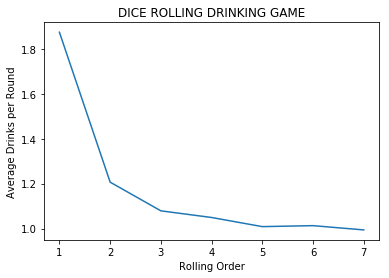

In [99]:
df['Drinks_per_round'].plot(title = 'DICE ROLLING DRINKING GAME', 
                            xlabel = 'Rolling Order',
                            ylabel = 'Average Drinks per Round')

In [ ]:
## NEXT STEP
# graph each person's distibution of what they rolled

In [ ]:
# drinks_start = ['1', '1', '1', '1', '1', '1'] # 1 means the cup is full, 0 means it is empty
n = 6
rounds = 5
samples = 1000

box = {}
rng = default_rng()

aggbox = {}

count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0


for sample in range(samples):
    drinks_start = ['1', '1', '1', '1', '1', '1'] # 1 means the cup is full, 0 means it is empty
    for round in range(rounds):
        for person in range(1,n+1):
            if round == 0:
                box[person] = 0
            dice = (rng.integers(1,7)) - 1
            if drinks_start[dice] == '1': # first roll
                box[person] += 1
                drinks_start[dice] = '0'
                dice = (rng.integers(1,7)) - 1
                count_1 += 1
                if drinks_start[dice] == '1': # second roll
                    box[person] += 1
                    drinks_start[dice] = '0'
                    dice = (rng.integers(1,7)) - 1
                    count_2 += 1
                    if drinks_start[dice] == '1': # third roll
                        box[person] += 1
                        drinks_start[dice] = '0'
                        dice = (rng.integers(1,7)) - 1
                        count_3 += 1
                        if drinks_start[dice] == '1': # fourth roll
                            box[person] += 1
                            drinks_start[dice] = '0'
                            dice = (rng.integers(1,7)) - 1
                            count_4 += 1
                            if drinks_start[dice] == '1': # fifth roll
                                box[person] += 1
                                drinks_start[dice] = '0'
                                dice = (rng.integers(1,7)) - 1
                                count_5 += 1
                                if drinks_start[dice] == '1': # sixth roll
                                    box[person] += 1
                                    drinks_start[dice] = '0'
                                    count_6 += 1
                                else:
                                    drinks_start[dice] = '1'
                            else:
                                drinks_start[dice] = '1'
                        else:
                            drinks_start[dice] = '1'
                    else:
                        drinks_start[dice] = '1'
                else:
                    drinks_start[dice] = '1'
            else:
                drinks_start[dice] = '1'
                count_0 += 1
    for person in range(1,n+1):
        if sample == 0:
            aggbox[person] = 0
            aggbox[person] += box[person]
        else:
            aggbox[person] += box[person]
print(aggbox)
print(count_1, count_2, count_3, count_4, count_5, count_6, count_0)